In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [3]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   tb         300 non-null    int64         
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


Merapihkan Data TB 2018-2023

In [5]:
import calendar

In [6]:
# Filter for years 2018-2022
df_tb = df_excel[(df_excel['year'] >= 2018) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT and month
tb_total = df_tb.groupby(['KABKOT', 'month'])['tb'].sum()
tb_total

KABKOT           month
JAKARTA BARAT    1        3404
                 2        2822
                 3        3223
                 4        3053
                 5        2812
                 6        2678
                 7        2851
                 8        2970
                 9        3086
                 10       3191
                 11       3231
                 12       2867
JAKARTA PUSAT    1        3100
                 2        2371
                 3        2598
                 4        2447
                 5        2199
                 6        2108
                 7        2473
                 8        2417
                 9        2348
                 10       2076
                 11       2090
                 12       1970
JAKARTA SELATAN  1        3086
                 2        2470
                 3        2809
                 4        2710
                 5        2376
                 6        2541
                 7        2793
                

Merapihkan Data SO2 2018-2023

In [8]:
df_so2 = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/SO_2/dissolved_result_so2.csv')
df_so2 = df_so2.drop(['Unnamed: 0'], axis=1)
print(df_so2.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'so2', 'time'], dtype='object')


In [9]:
# Filter for years 2018-2022
df_so2 = df_so2[(df_so2['year'] >= 2018) & (df_so2['year'] <= 2022)]

# Group so2_mean by KABKOT and month
so2_mean = df_so2.groupby(['KABKOT', 'month'])['so2'].mean()
so2_mean

KABKOT           month
JAKARTA BARAT    1         73.196409
                 2         70.596289
                 3         93.152834
                 4        109.278883
                 5        121.620729
                 6        118.194724
                 7        120.386566
                 8        105.618777
                 9        100.528707
                 10        95.964245
                 11        90.073278
                 12        78.118361
JAKARTA PUSAT    1         76.073085
                 2         72.759770
                 3         96.361015
                 4        111.834251
                 5        124.031465
                 6        120.067365
                 7        121.950738
                 8        106.341868
                 9        101.555743
                 10        97.308785
                 11        92.481746
                 12        81.012368
JAKARTA SELATAN  1         80.754421
                 2         77.760043
               

Merge Files

In [10]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_so2 = pd.merge(tb_total, so2_mean, on=['KABKOT', 'month'])
df_tb_so2

tb         so2
KABKOT          month                  
JAKARTA BARAT   1      3404   73.196409
                2      2822   70.596289
                3      3223   93.152834
                4      3053  109.278883
                5      2812  121.620729
                6      2678  118.194724
                7      2851  120.386566
                8      2970  105.618777
                9      3086  100.528707
                10     3191   95.964245
                11     3231   90.073278
                12     2867   78.118361
JAKARTA PUSAT   1      3100   76.073085
                2      2371   72.759770
                3      2598   96.361015
                4      2447  111.834251
                5      2199  124.031465
                6      2108  120.067365
                7      2473  121.950738
                8      2417  106.341868
                9      2348  101.555743
                10     2076   97.308785
                11     2090   92.481746
                12     1970   81.012368
JAKARTA SELATAN 1      3086   80.754421
                2      2470   77.760043
                3      2809  102.100785
                4      2710  119.884299
                5      2376  133.435085
                6      2541  129.262721
                7      2793  131.216935
                8      2691  114.084216
                9      2720  107.733124
                10     2477  102.658746
                11     2285   97.431918
                12     2155   85.420133
JAKARTA TIMUR   1      4791   78.327845
                2      3751   74.487084
                3      4836   98.593930
                4      4400  114.039920
                5      3831  126.489073
                6      3882  122.157166
                7      4265  123.773493
                8      4318  107.043365
                9      4573  101.981356
                10     3732   97.760605
                11     3475   93.901953
                12     3275   82.972461
JAKARTA UTARA   1      2541   70.173550
                2      1856   66.595575
                3      2181   88.953934
                4      2105  102.254756
                5      1941  113.100965
                6      1834  109.489437
                7      2035  111.222004
                8      2135   96.996468
                9      2135   93.476600
                10     1812   90.047930
                11     1811   85.858437
                12     1686   75.147927

In [11]:
df_tb_so2 = df_tb_so2.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'so2':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [12]:
df_tb_so2

,KABKOT,month,tb,so2
0,JAKARTA BARAT,1,3404,73.196409
1,JAKARTA BARAT,2,2822,70.596289
2,JAKARTA BARAT,3,3223,93.152834
3,JAKARTA BARAT,4,3053,109.278883
4,JAKARTA BARAT,5,2812,121.620729
5,JAKARTA BARAT,6,2678,118.194724
6,JAKARTA BARAT,7,2851,120.386566
7,JAKARTA BARAT,8,2970,105.618777
8,JAKARTA BARAT,9,3086,100.528707
9,JAKARTA BARAT,10,3191,95.964245


In [13]:
df_tb_so2.shape

(60, 4)

In [14]:
#df_tb_so2.to_csv("/Users/Jia/Downloads/data_skripsi/a_overlay/tb_so2.csv")

Datetime edit for 'month'

In [15]:
import calendar

# Format for monthly graph
df_tb_so2['month'] = pd.to_datetime(df_tb_so2['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_so2 = df_tb_so2.set_index('month').reset_index()

In [16]:
df_tb_so2

,month,KABKOT,tb,so2
0,January,JAKARTA BARAT,3404,73.196409
1,February,JAKARTA BARAT,2822,70.596289
2,March,JAKARTA BARAT,3223,93.152834
3,April,JAKARTA BARAT,3053,109.278883
4,May,JAKARTA BARAT,2812,121.620729
5,June,JAKARTA BARAT,2678,118.194724
6,July,JAKARTA BARAT,2851,120.386566
7,August,JAKARTA BARAT,2970,105.618777
8,September,JAKARTA BARAT,3086,100.528707
9,October,JAKARTA BARAT,3191,95.964245


Overlay layer plot for TB and SO 2

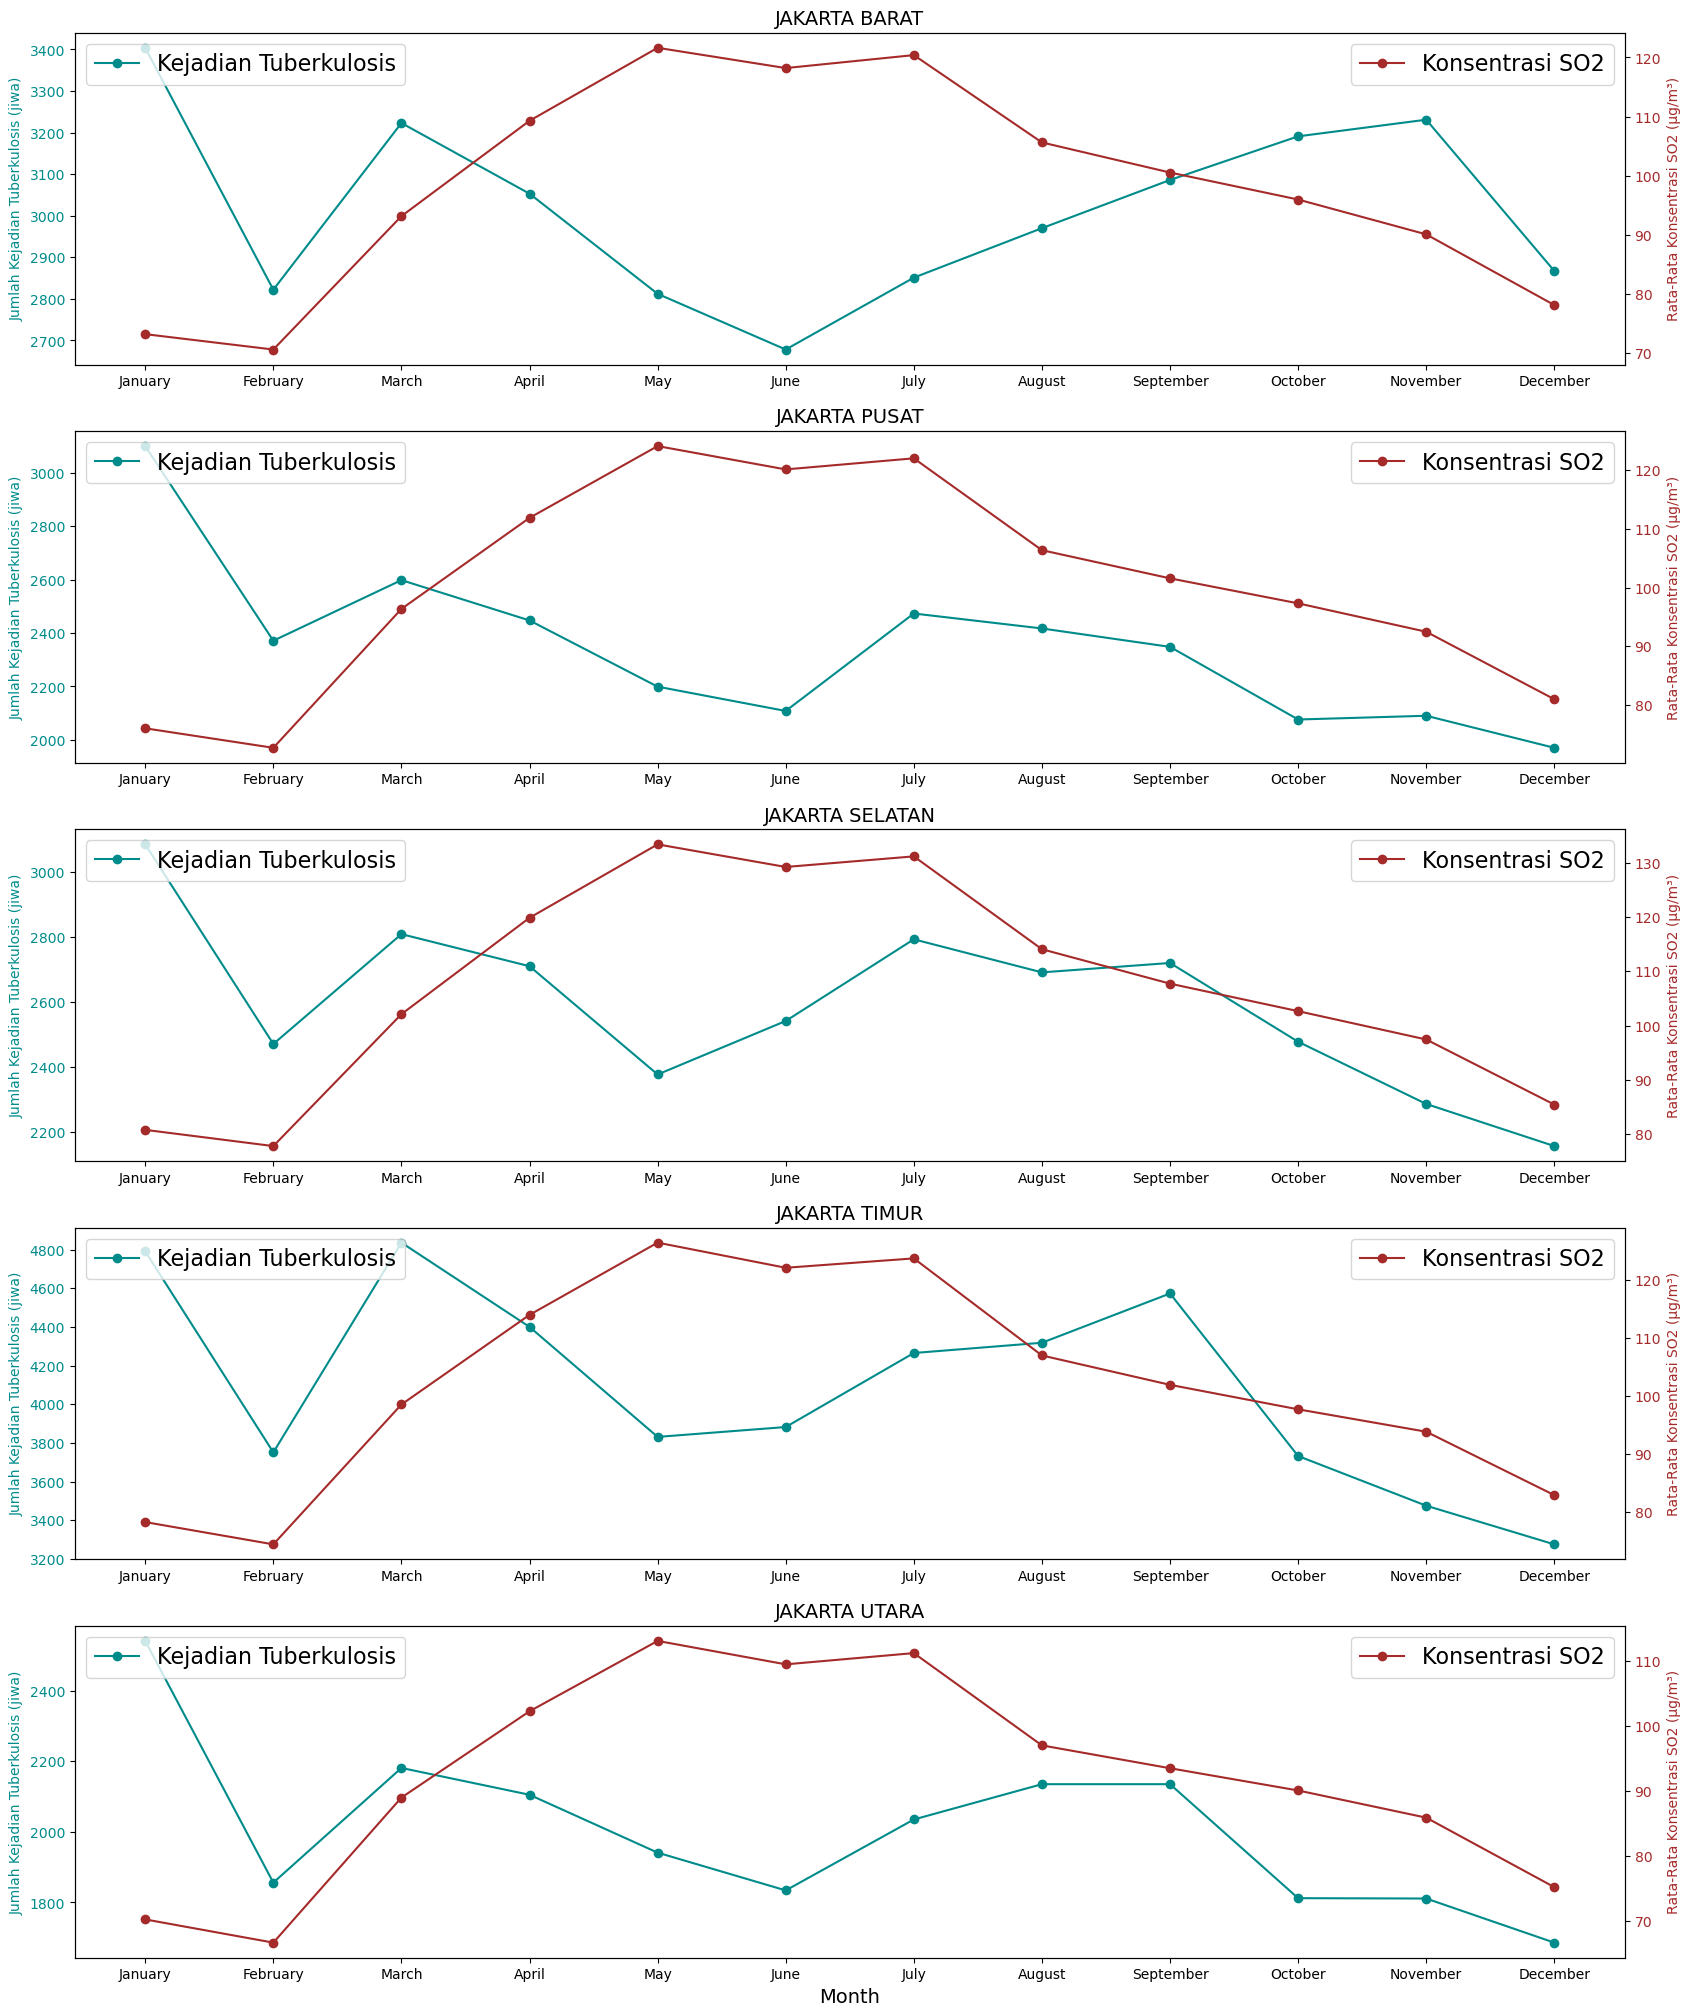

In [17]:
indicators = ['tb', 'so2']

# Group data by KABKOT
grouped_data = df_tb_so2.groupby('KABKOT')

# Plot time series for 'tb' and 'so2' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['so2']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Konsentrasi SO2', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Konsentrasi SO2 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()